# Analyze Return and Risk

This notebook aims at analyzing the return and risks of certain stocks and and potfolio.

## Import data and libraries

In [2]:
from pandas_datareader import data as wb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/Users/dangminh.nguyen/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
df = wb.DataReader('QQQ', data_source='yahoo', start='1995-1-1')

In [4]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1999-03-10,51.156250,50.28125,51.12500,51.0625,5232000.0,44.600906
1999-03-11,51.734375,50.31250,51.43750,51.3125,9688600.0,44.819260
1999-03-12,51.156250,49.65625,51.12500,50.0625,8743600.0,43.727436
1999-03-15,51.562500,49.90625,50.43750,51.5000,6369000.0,44.983032
1999-03-16,52.156250,51.15625,51.71875,51.9375,4905800.0,45.365170


Text(0.5, 1.0, 'Adjusted close')

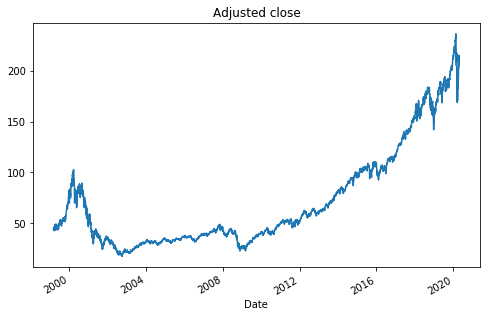

In [5]:
df['Adj Close'].plot(figsize=(8,5))
plt.title('Adjusted close')

## Single stock return

Text(0.5, 1.0, 'Simple return')

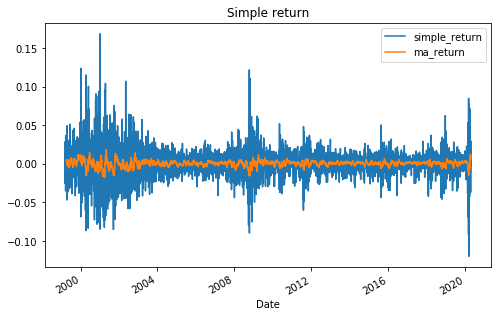

In [6]:
df['simple_return'] = (df['Adj Close']/df['Adj Close'].shift(1))-1
df['ma_return'] = df['simple_return'].rolling(window=20).mean()
df[['simple_return','ma_return']].plot(figsize=(8,5))
plt.title('Simple return')

In [8]:
avg_return_d = df['simple_return'].mean()
print("Daily average return: %.5f%%"%(avg_return_d*100))

Daily average return: 0.04508%


In [10]:
avg_return_a = avg_return_d*250
print("Anual average return: %.5f%%"%(avg_return_a*100))

Anual average return: 11.27080%


## Portfolio return

In [11]:
stocks = ['QQQ','ARKW',"VTI","^GSPC",'VDC']
df_mix = pd.DataFrame()
for t in stocks:
    df_mix[t] = wb.DataReader(t, data_source='yahoo', start='2017-1-1')['Adj Close']

Text(0.5, 1.0, 'Price chart')

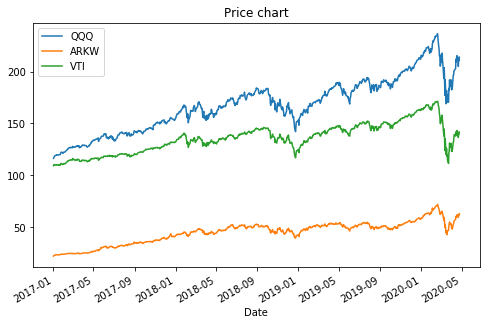

In [12]:
df_mix[['QQQ','ARKW','VTI']].plot(figsize=(8,5))
plt.title('Price chart')

Text(0.5, 1.0, '% increase')

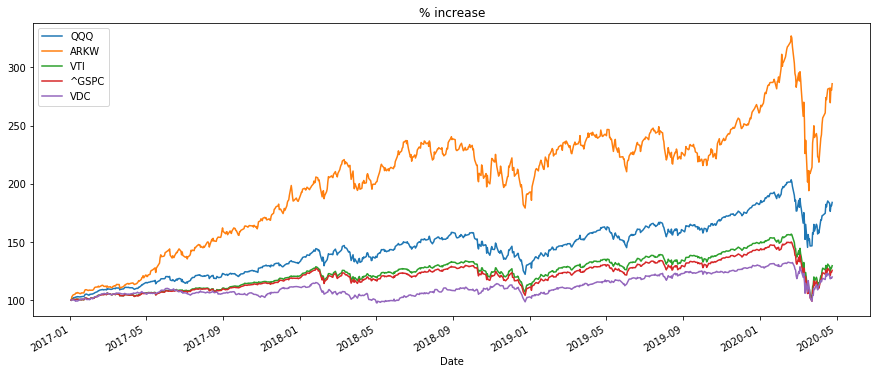

In [13]:
(df_mix/df_mix.iloc[0]*100).plot(figsize=(15,6))
plt.title('% increase')

## Risk

In [14]:
df_mix_return = df_mix[stocks]/df_mix[stocks].shift(1)-1

In [15]:
print("Return")
df_mix_return.mean()*100*250

Return


QQQ      20.980852
ARKW     36.068495
VTI       9.896668
^GSPC     8.998745
VDC       6.969645
dtype: float64

In [16]:
print('Std')
df_mix_return.std()*100*250**0.5

Std


QQQ      23.018238
ARKW     29.799905
VTI      20.467744
^GSPC    20.619457
VDC      17.397465
dtype: float64

Text(0.5, 1, 'Pair-wise correlation')

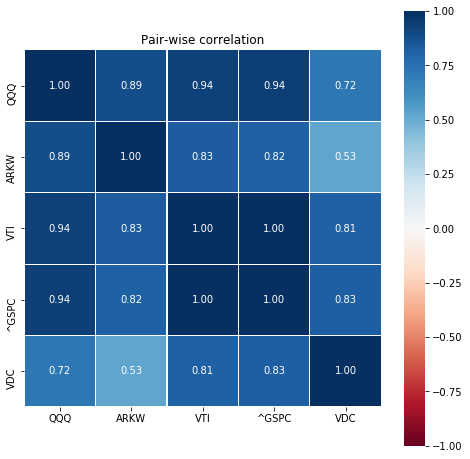

In [17]:
colormap = plt.cm.RdBu
plt.figure(figsize=(8,8))
sns.heatmap(df_mix_return[stocks].astype(float).corr(), linewidths=0.1, vmax=1.0, vmin=-1., square=True, cmap=colormap, linecolor='white', annot=True,fmt=".2f")
plt.title('Pair-wise correlation')

## Portfolio risk

In [18]:
w = np.array([0.5, 0.25, 0.25])

In [19]:
portfolio_var = np.dot(w.T, np.dot(df_mix_return[['QQQ','VTI','ARKW']].cov()*250,w))
print("Variance: ",portfolio_var)
print("Volatitlity: %.3f%%"%(portfolio_var**0.5*100))

Variance:  0.053932580803174285
Volatitlity: 23.223%


## Diversifiable and Non-diversifiable risk

In [20]:
QQQ_var = df_mix_return['QQQ'].var()*250
VTI_var = df_mix_return['VTI'].var()*250
ARKW_var = df_mix_return['ARKW'].var()*250

In [21]:
dr = portfolio_var - (w[0]**2*QQQ_var) - (w[1]**2*VTI_var) - (w[2]**2*ARKW_var)
print("Diversifiable risk: %.2f%%"%(dr**0.5*100))

Diversifiable risk: 18.03%
